#  <u>*Month 2 ,Week 2 : Global Land Temperatures Analysis .*</u>

## *List of Content*

[*Analysis objective*](#Analysis_objective)<br>
[*Importing data*](#Importing_data)<br>
[*Data shape*](#Data_shape)<br>
[*Data info*](#Data_info)<br>
[*Data Cleaning*](#Data_Cleaning)<br>
[*Data describtion*](#Data_describtion)<br>
[*Feature Selection*](#Feature_Selection)<br>
[*Feature Engineering*](#Feature_Engineering)<br>
[*Some Insights*](#Some_Insights)<br>
[*Features developments (SMA,CMA,EMA,EMWA)*](#Features_developments)<br>
[*Analysis conducting using SARIMAX MODUL*](#Analysis_conducting)<br>

---

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime,time

---

<a id="Analysis_objective"></a>

## <u>*Analysis objective*</u>
### *To predict the 'LandAverageTemperature' for the years 2016, 2017, and 2018, broken down on a monthly basis*

---

<a id="Importing_data"></a>

## *A.* <u>*Importing data*</u>

In [3]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Week_1\DataFiles\GlobalLandTemperatures_GlobalTemperatures.csv")
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


---

<a id="Data_shape"></a>

## *B.* <u>*Data shape*</u>

In [4]:
df.shape

(3192, 9)

---

<a id="Data_info"></a>

## *C.* <u>*Data info*</u>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


---

<a id="Data_Cleaning"></a>

##  *D.* <u>*Data Cleaning*</u>

### *D.1 Converting the colnames to lower case*

In [6]:
import janitor
df=df.clean_names()

### *D.2 converting the date features "dt" to datetime type ,then renaming it with a proper name "date" and drop "dt"*

In [7]:
df["date"]=pd.to_datetime(df["dt"])

In [8]:
df.drop("dt",axis=1,inplace=True)

In [9]:
df.set_index("date",inplace=True)

### *D.3 na-values*

In [10]:
df.isna().sum().sum()
df.isna().sum()

landaveragetemperature                         12
landaveragetemperatureuncertainty              12
landmaxtemperature                           1200
landmaxtemperatureuncertainty                1200
landmintemperature                           1200
landmintemperatureuncertainty                1200
landandoceanaveragetemperature               1200
landandoceanaveragetemperatureuncertainty    1200
dtype: int64

> #### *The na_values for landaveragetemperature & landaveragetemperatureuncertainty are from '1750-11-01' to '1752-09-01'*
> #### *Since the data starts from '1849-12-01' for the other features we got 1200 rows with missed data*
> #### *We will drop all of the na-values*

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(1992, 8)

---

<a id="Data_describtion"></a>

##  *E.* <u>*Data describtion*</u>

### *E.1 Data describtion In table*

In [13]:
pd.DataFrame(df.describe())

,landaveragetemperature,landaveragetemperatureuncertainty,landmaxtemperature,landmaxtemperatureuncertainty,landmintemperature,landmintemperatureuncertainty,landandoceanaveragetemperature,landandoceanaveragetemperatureuncertainty
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.263193,0.224030,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,0.404000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.430000,0.099750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.850500,0.230000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.858500,0.347250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,15.482000,1.492000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


### *E.2 Data describtion Visualization*

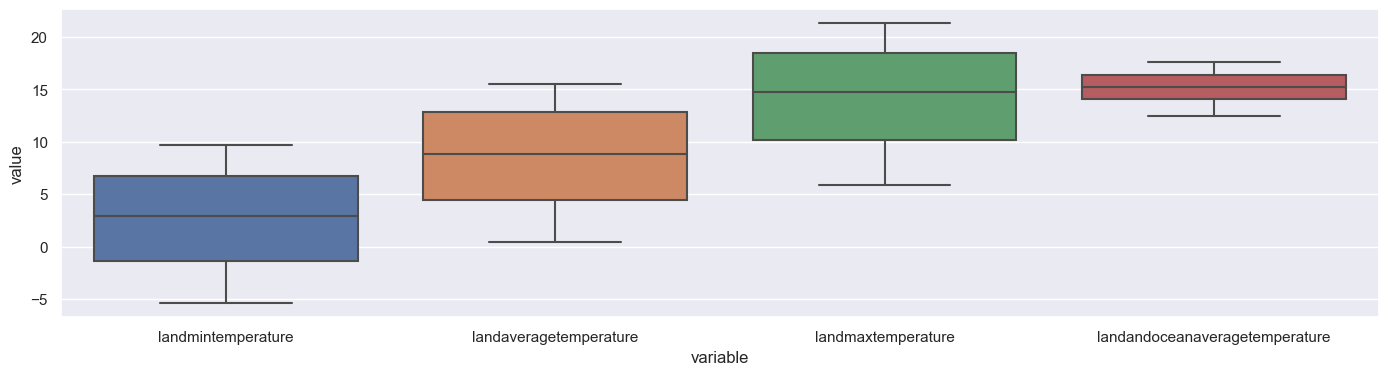

In [14]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.boxplot(data=df.melt(value_vars=["landmintemperature","landaveragetemperature","landmaxtemperature","landandoceanaveragetemperature"]),
            x='variable', y='value');

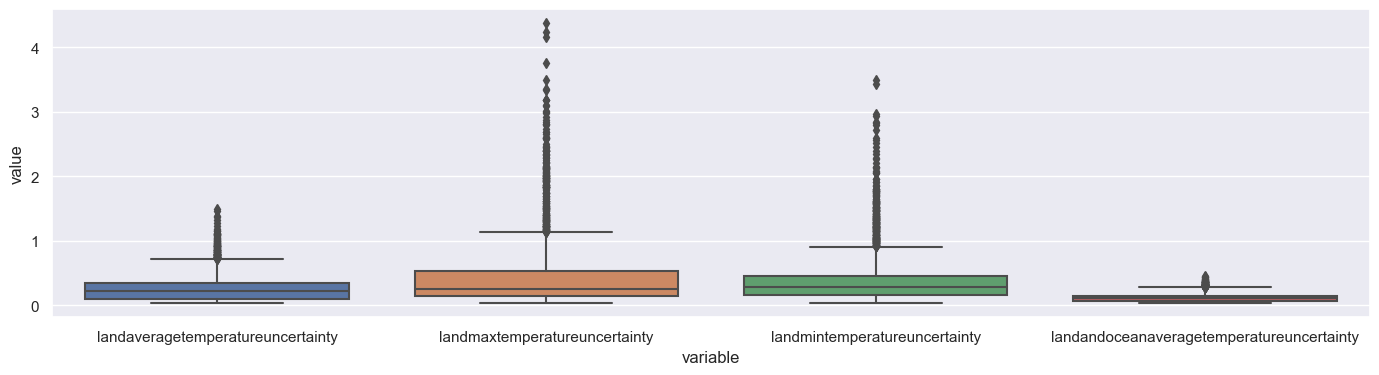

In [15]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.boxplot(data=df.melt(value_vars=["landaveragetemperatureuncertainty","landmaxtemperatureuncertainty","landmintemperatureuncertainty",
                                    "landandoceanaveragetemperatureuncertainty"]),
            x='variable', y='value');

>  <font color=red>----> *In the 1st chart we can see that Non of the visualized variables have outliers, but the visualized variables In the 2nd chart have have outliers*<br>
> ----> *When revisualize these variables , we can clearly see that the uncertaintly were high in the beggining years and decreasong by year fowards.(-the the below line charts)*


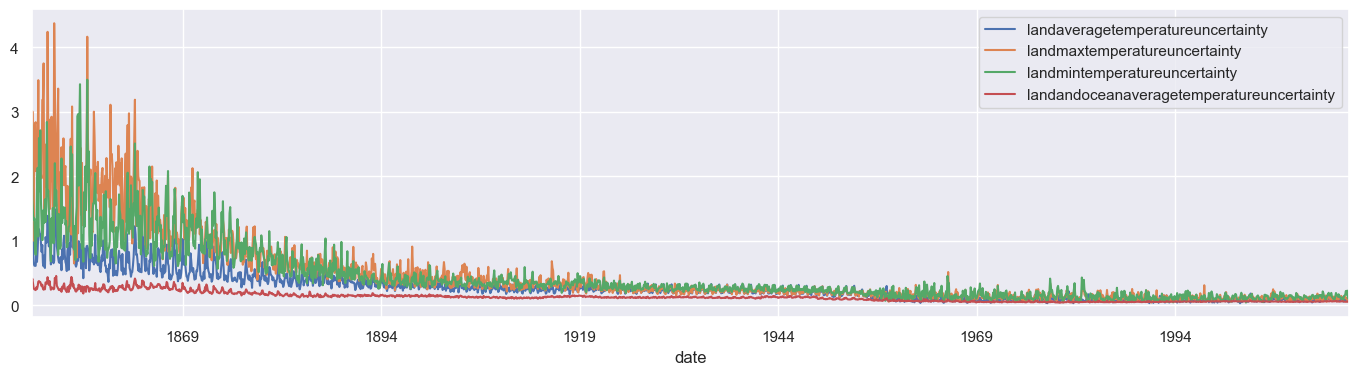

In [16]:
df[["landaveragetemperatureuncertainty","landmaxtemperatureuncertainty","landmintemperatureuncertainty",
                                    "landandoceanaveragetemperatureuncertainty"]].plot(figsize=(17, 4));

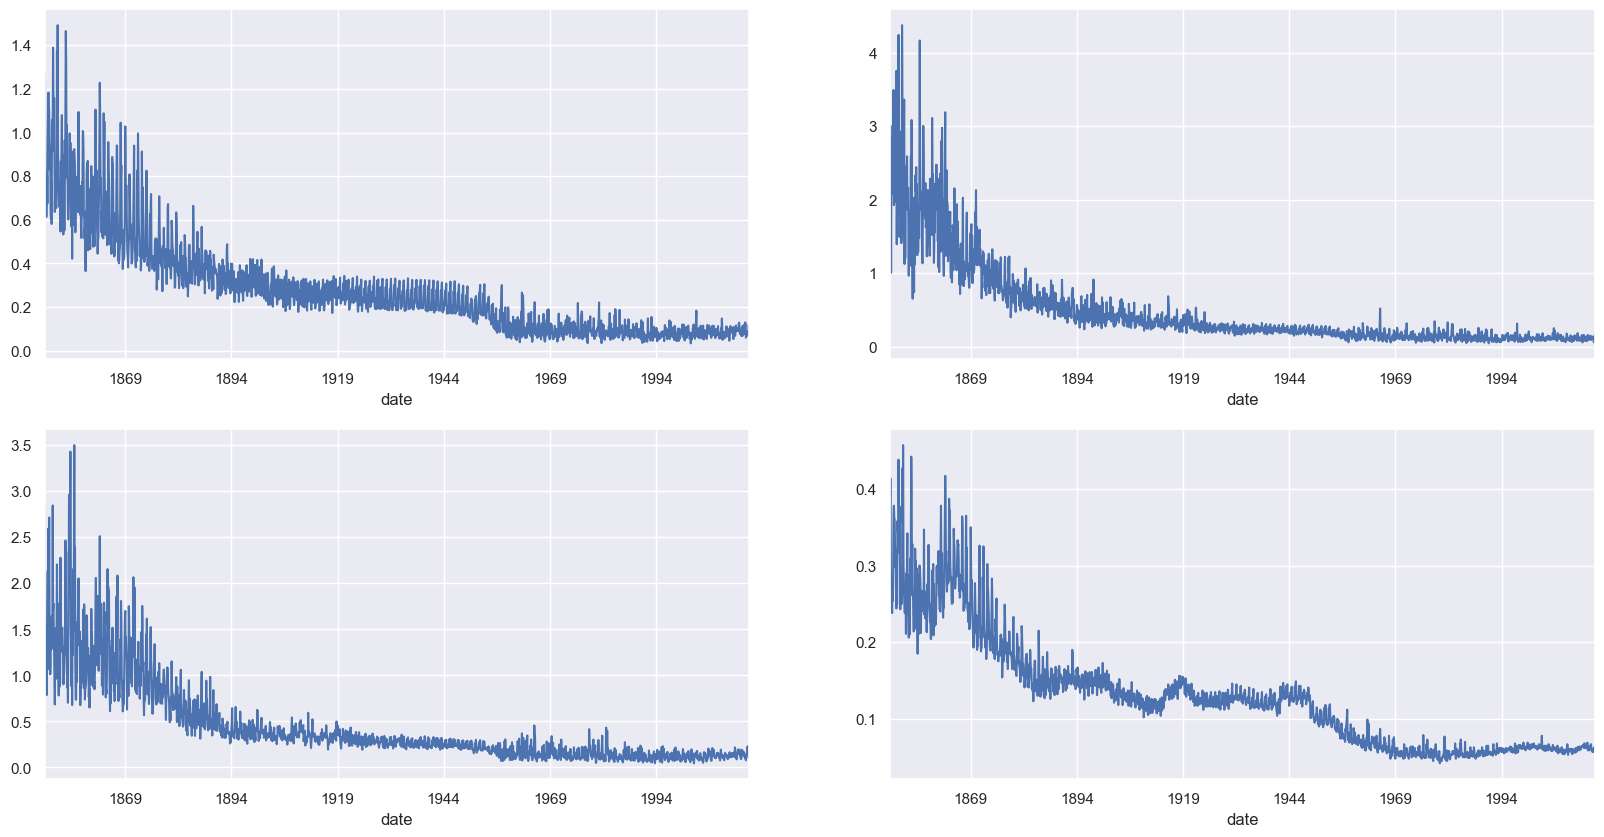

In [17]:
plt.subplot(221)
df["landaveragetemperatureuncertainty"].plot();
## -----------------------------------------------------------------------------------------------------------
plt.subplot(222)
df["landmaxtemperatureuncertainty"].plot();
## -----------------------------------------------------------------------------------------------------------
plt.subplot(223)
df["landmintemperatureuncertainty"].plot();
## -----------------------------------------------------------------------------------------------------------
plt.subplot(224)
df["landandoceanaveragetemperatureuncertainty"].plot();

> *--> This high uncertainty may be due to the leak of super technology that can increase the accurecy in data capturin*ty

---

<a id="Feature_Selection"></a>

## *F.* <u>*Feature Selection*</u>

### *defining x & y*

In [18]:
x=df.drop("landaveragetemperature",axis=1)
y=df["landaveragetemperature"]

### *F.1 SelectKBest -Selecting the best 3 features based on the best score*

In [19]:
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression  
best=SelectKBest(score_func=f_regression,k=3).fit_transform(x,y)
best

array([[ 8.242, -3.206, 12.833],
       [ 9.97 , -2.291, 13.588],
       [10.347, -1.905, 14.043],
       ...,
       [16.45 ,  5.232, 16.29 ],
       [12.892,  2.157, 15.252],
       [10.725,  0.287, 14.774]])

### *F.2 ExtraTreesRegressor -Selecting the best 3 features based on the best importance*

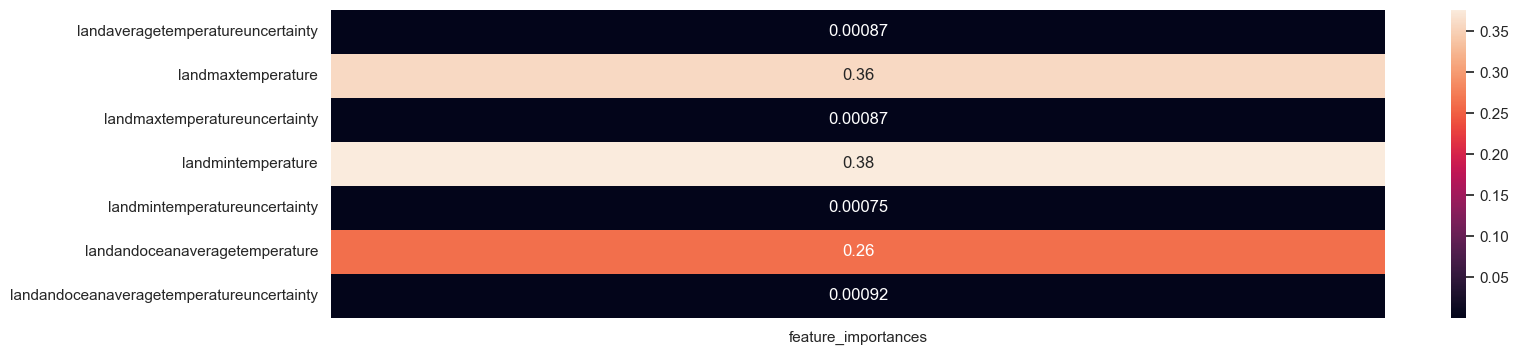

In [20]:
from sklearn.ensemble import  ExtraTreesRegressor
best=ExtraTreesRegressor().fit(x,y)
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(pd.DataFrame({"feature_importances":best.feature_importances_},best.feature_names_in_),annot=True);

### *F.3 Creating new dataset with the best features then looking at the correlation between them to confirm they are highly correlated*

In [21]:
data=df[["landaveragetemperature","landmaxtemperature","landmintemperature","landandoceanaveragetemperature"]]

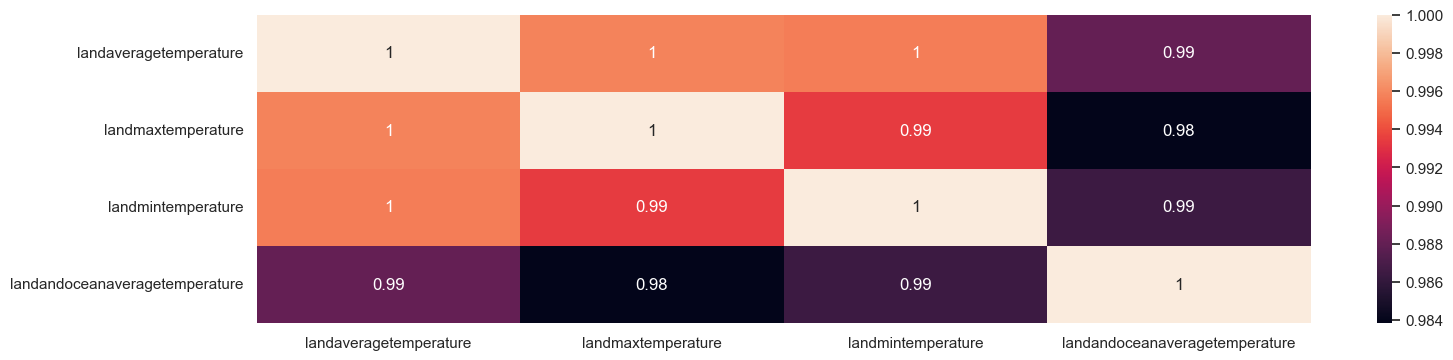

In [22]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(data.corr(),annot=True);

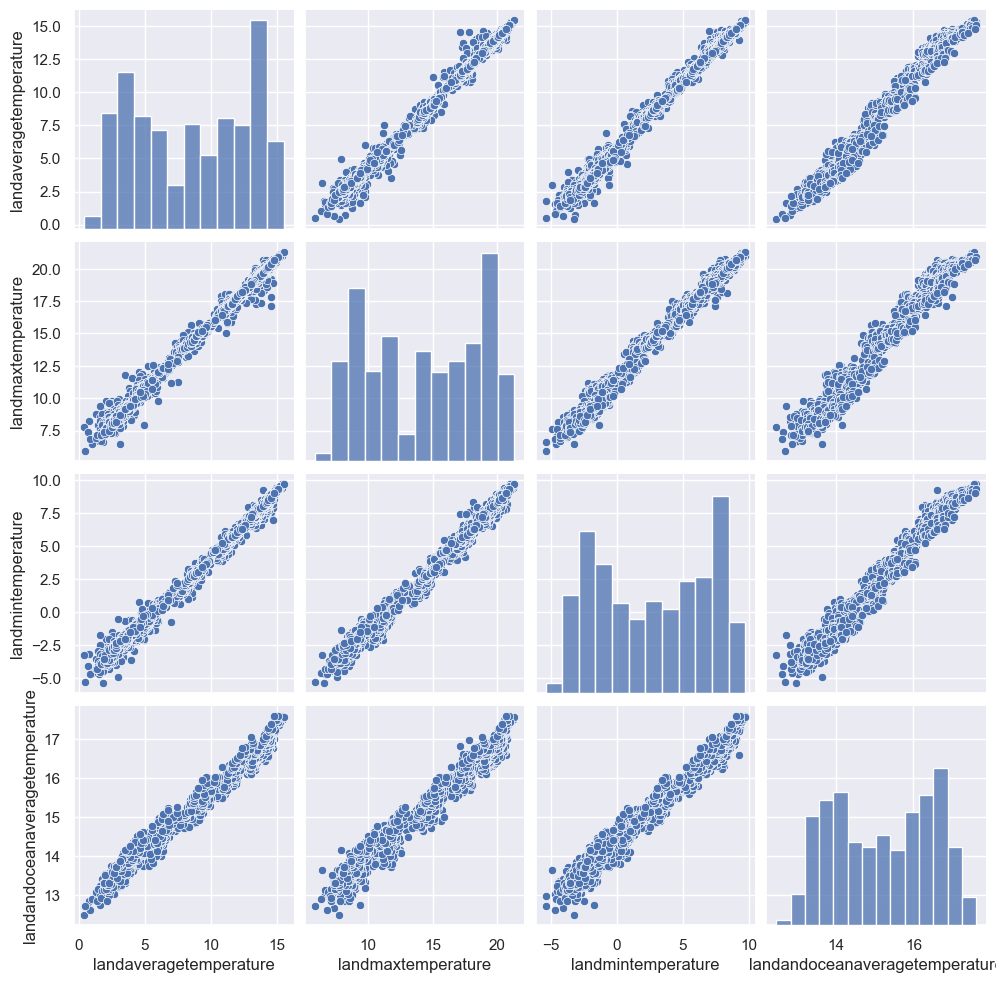

In [23]:
sns.pairplot(data);

### *F.4 Visualizing the data set -with the most important features*

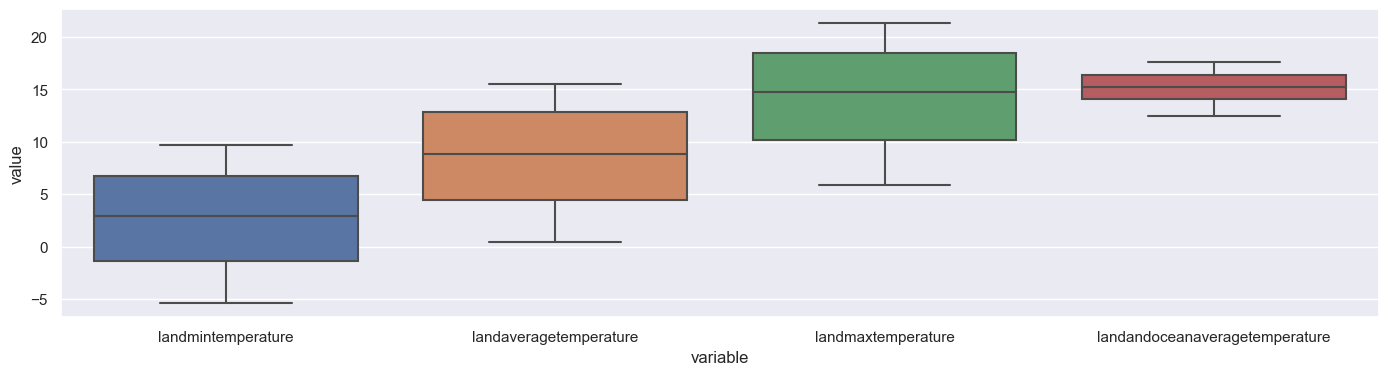

In [24]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.boxplot(data=data.melt(value_vars=["landmintemperature","landaveragetemperature","landmaxtemperature","landandoceanaveragetemperature"]),
            x='variable', y='value');

---

<a id="Feature_Engineering"></a>

## *G.* <u>*Feature Engineering*</u>
### *Extracting year,month,day,quarter,decade*

In [25]:
data.reset_index(inplace=True)

In [26]:
data["year"]=data["date"].dt.year
data["month"]=data["date"].dt.month_name()
data["day"]=data["date"].dt.day_name()
data["quarter"]=data["date"].dt.quarter
data["decade"]= data['year'] - (data['year']%10)

In [27]:
data.set_index("date",inplace=True)

In [28]:
data.head()

,landaveragetemperature,landmaxtemperature,landmintemperature,landandoceanaveragetemperature,year,month,day,quarter,decade
date,,,,,,,,,
1850-01-01,0.749,8.242,-3.206,12.833,1850,January,Tuesday,1,1850
1850-02-01,3.071,9.970,-2.291,13.588,1850,February,Friday,1,1850
1850-03-01,4.954,10.347,-1.905,14.043,1850,March,Friday,1,1850
1850-04-01,7.217,12.934,1.018,14.667,1850,April,Monday,2,1850
1850-05-01,10.004,15.655,3.811,15.507,1850,May,Wednesday,2,1850


---

<a id="Some_Insights"></a>

## *H.* <u>*Some Insights*</u>

#### *H.1<BR>dataset date start*

In [29]:
data.index.min()

Timestamp('1850-01-01 00:00:00')

#### *H.2<BR>dataset date end*

In [30]:
data.index.max()

Timestamp('2015-12-01 00:00:00')

#### *H.3<BR>the top 5 years that have the highest landaveragetemperature*

In [31]:
pd.DataFrame(data.groupby(["year"])["landaveragetemperature"].max().sort_values(ascending=False)).head()

,landaveragetemperature
year,
2011,15.482
2002,15.354
1998,15.340
2009,15.231
2007,15.230


#### *H.4<BR>the top 5 years that have the lowest landaveragetemperature*

In [32]:
pd.DataFrame(data.groupby(["year"])["landaveragetemperature"].max().sort_values(ascending=True)).head()

,landaveragetemperature
year,
1884,13.622
1858,13.677
1912,13.723
1882,13.747
1863,13.765


#### *H.5<BR>month ranking by landaveragetemperature from the highest to the lowest*

In [33]:
pd.DataFrame(data.groupby(["month"])["landaveragetemperature"].max().sort_values(ascending=False))

,landaveragetemperature
month,
July,15.482
August,15.012
June,14.568
September,13.217
May,12.590
October,10.801
April,9.823
November,7.487
March,6.906


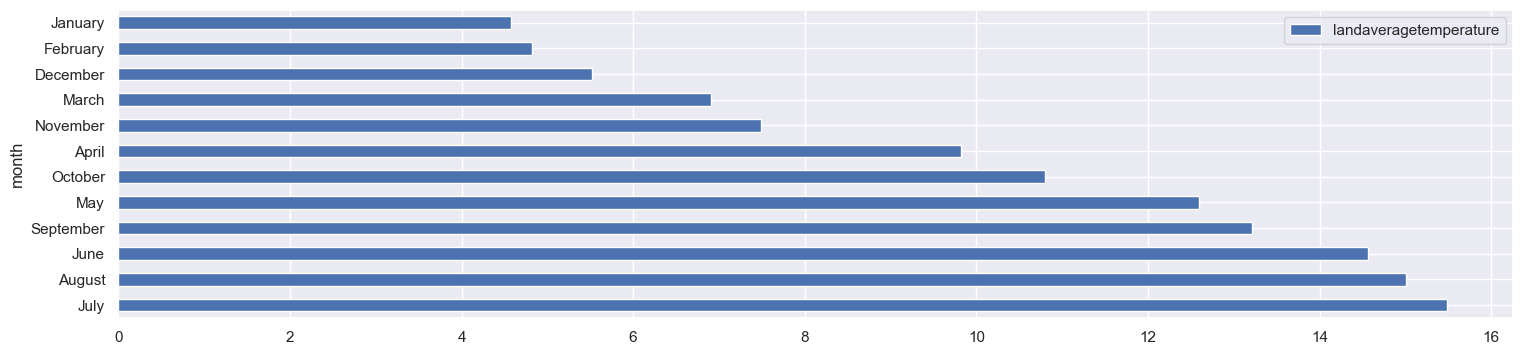

In [34]:
pd.DataFrame(data.groupby(["month"])["landaveragetemperature"].max().sort_values(ascending=False)).plot(kind="barh",figsize=(18,4));

#### *H.6<BR>decade ranking by landaveragetemperature from the highest to the lowest*

In [35]:
pd.DataFrame(data.groupby(["quarter"])["landaveragetemperature"].max().sort_values(ascending=False))

,landaveragetemperature
quarter,
3,15.482
2,14.568
4,10.801
1,6.906


<Axes: ylabel='quarter'>

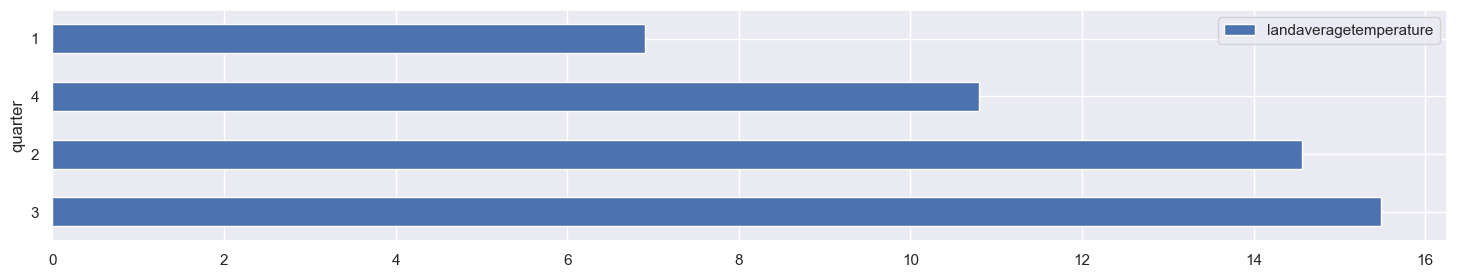

In [36]:
pd.DataFrame(data.groupby(["quarter"])["landaveragetemperature"].max().sort_values(ascending=False)).plot(kind="barh",figsize=(18,3))

#### *H.7<BR>the top 5 years/months in combination that have the highest landaveragetemperature*

In [37]:
pd.DataFrame(data.groupby(["year","month"])["landaveragetemperature"].max().sort_values(ascending=False)).head()

,,landaveragetemperature
year,month,
2011,July,15.482
2002,July,15.354
1998,July,15.340
2009,July,15.231
2007,July,15.230


#### *H.8<BR>the top 5 years/months in combination that have the lowest landaveragetemperature*

In [38]:
pd.DataFrame(data.groupby(["year","month"])["landaveragetemperature"].max().sort_values(ascending=True)).head()

,,landaveragetemperature
year,month,
1861,January,0.404
1893,January,0.500
1862,January,0.685
1850,January,0.749
1887,January,0.824


---

<a id="Features_developments"></a>

## *I.* <u>*Features developments*</u> 

### ---> *Before diving and applying the proper modul to conduct our prediction , lets look at the features developments during the past time -yearly basis*

### *I.1 SMA - Simple Moving Average (yearly)*

In [39]:
copy_data=data.copy()

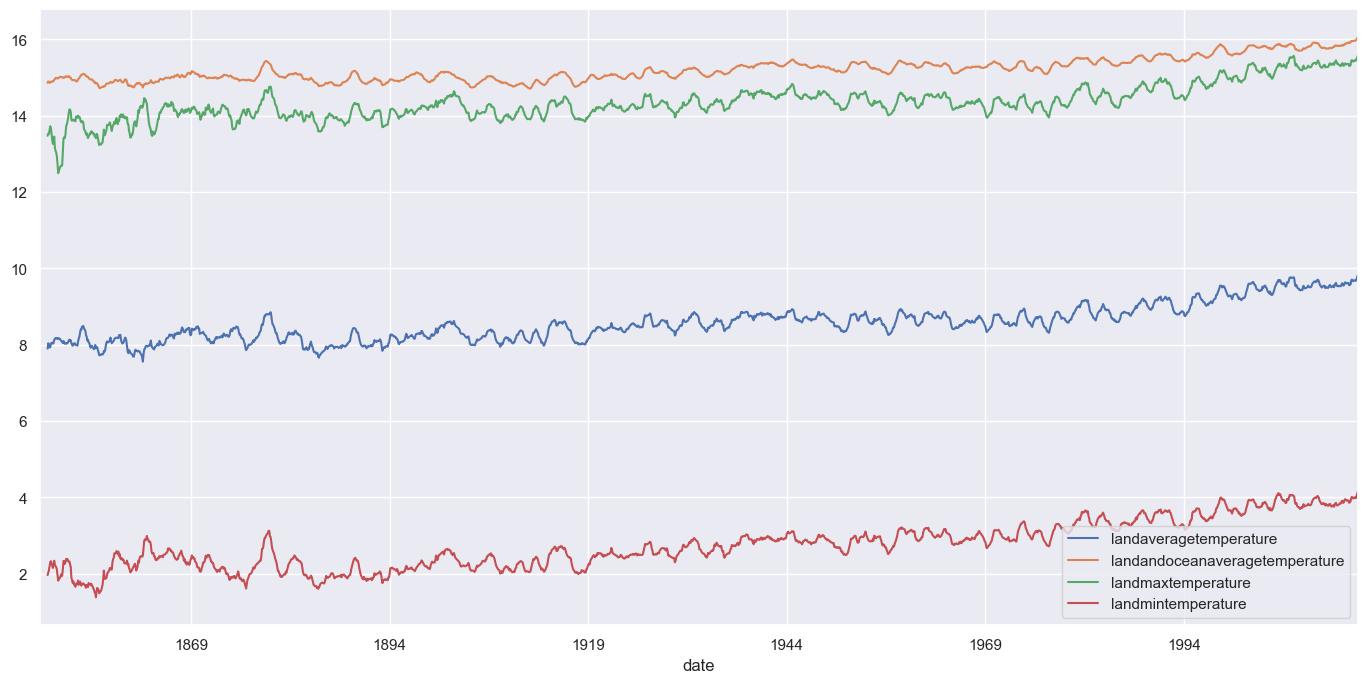

In [40]:
copy_data[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].rolling(window=12).mean().plot(figsize=(17,8));

### *I.2 CMA - Cumulative Moving Avearge (yearly)*

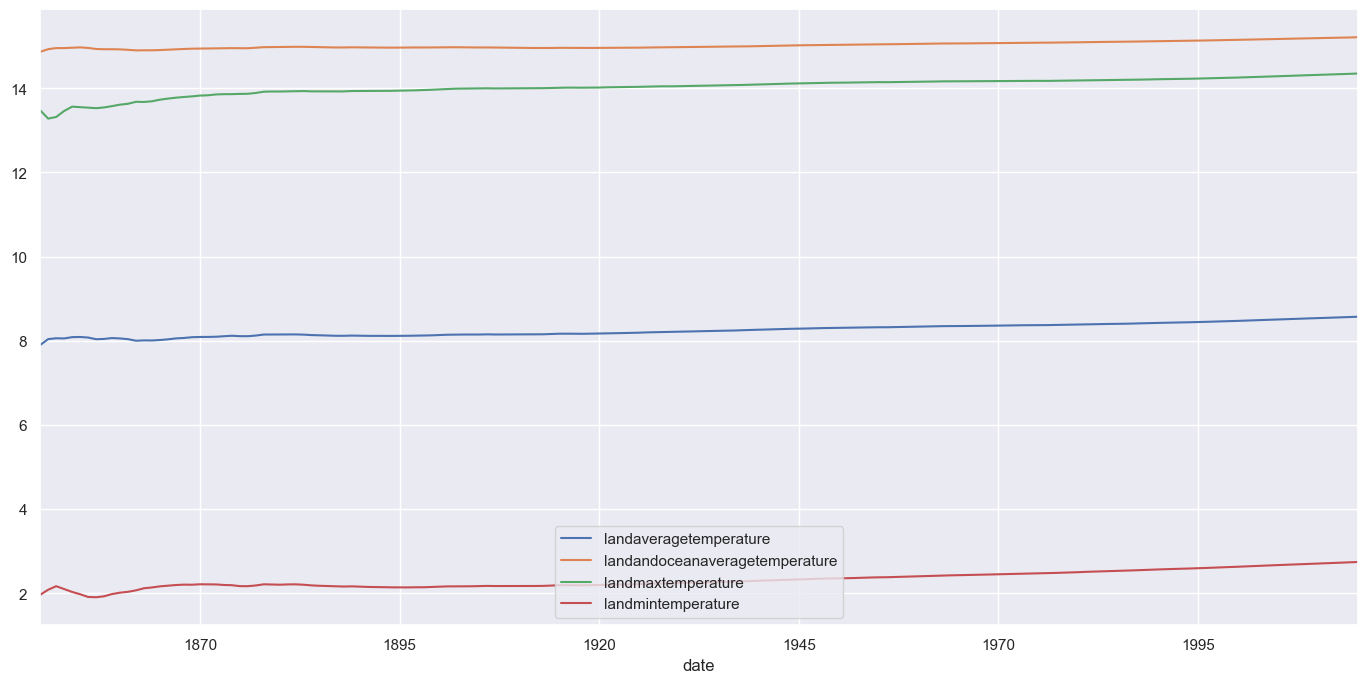

In [41]:
copy_data_y_resampled=copy_data[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].resample(rule="YS").mean()
copy_data_y_resampled[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].expanding().mean().plot(figsize=(17,8));

### *I.3 EMA - Exponential Moving Average (yearly)*

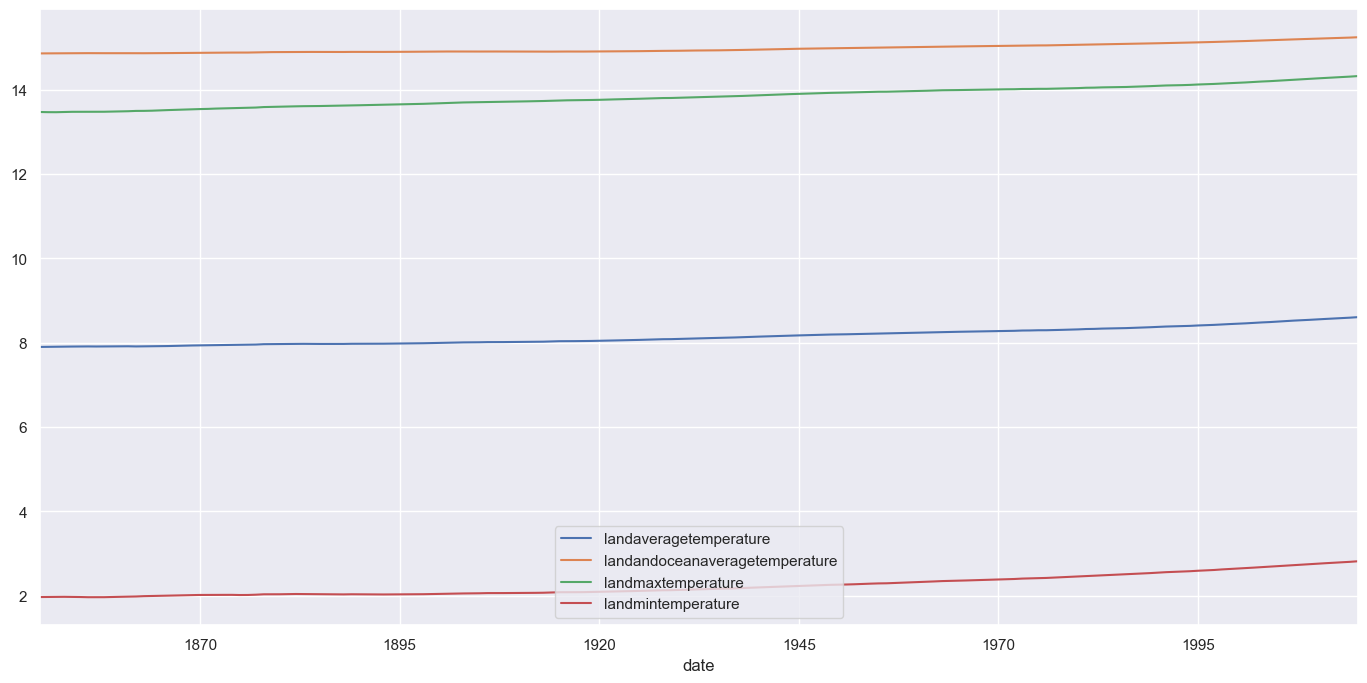

In [42]:
copy_data_y_resampled[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].ewm(alpha=.01,adjust=False).mean().plot(figsize=(17,8));

### *I.4 EMWA - Exponential Moving Weighted Average -- this the is best method to use when it comes to times series analysus as this one gives weight for the most recent data values (yearly)*   

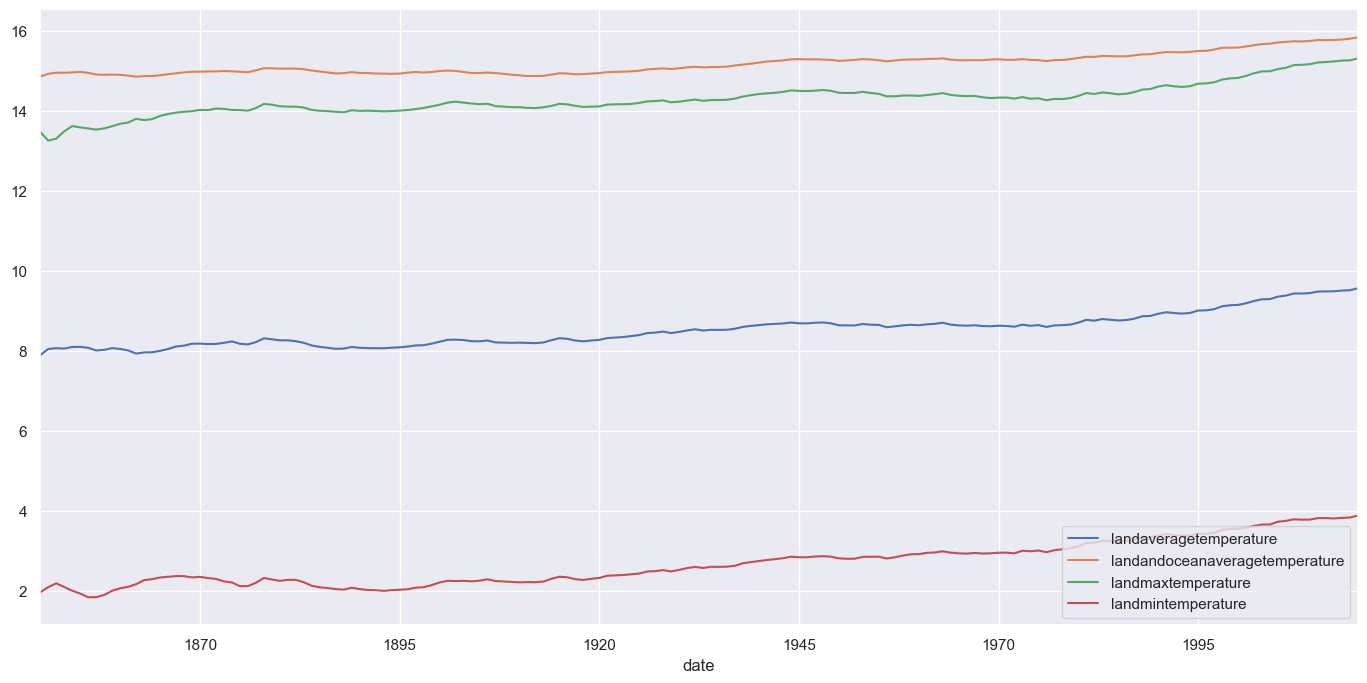

In [43]:
copy_data_y_resampled[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].ewm(span=12).mean().plot(figsize=(17,8));

---

<a id="Analysis_conducting"></a>

## *J.* <u>*Analysis Moduling*</u>

+ *Since we are applying SARIMAX, the modul automatically will handle the targeted feature it is not stationary*
+ *We will convert the exogenous features to stationaty in case found notthen add the new stationary features to the data set*

In [44]:
from statsmodels.tsa.stattools import adfuller
i=0
features=data[["landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]]
for x in features:
     results=adfuller(data.values[:,i])[1]
     if results > 0.05:
       print(data.columns[i] ," ",results)
     i +=1

landaveragetemperature   0.5554827476053961
landmaxtemperature   0.08176333074086611
landmintemperature   0.5518115910066801


In [45]:
adfuller(data["landandoceanaveragetemperature"].diff().dropna())
adfuller(data["landmaxtemperature"].diff().dropna())
adfuller(data["landmintemperature"].diff().dropna())

data["landandoceanaveragetemperature_1st_diff"]=data["landandoceanaveragetemperature"].diff()
data["landmaxtemperature_1st_diff"]=data["landmaxtemperature"].diff()
data["landmintemperature_1st_diff"]=data["landmintemperature"].diff()

data.dropna(axis=0,how="any",inplace=True)

### *J.1 ACF & PACF plots to determint the number of lags we need to use in our modul*

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict,acf,pacf

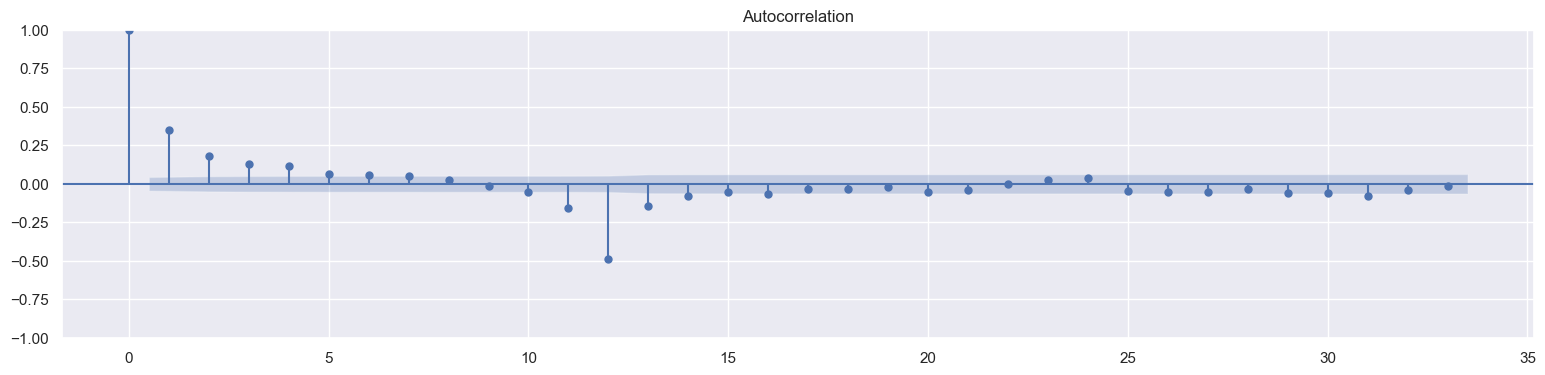

In [47]:
plot_acf(data["landaveragetemperature"].diff(12).dropna()).set_size_inches(19,4);

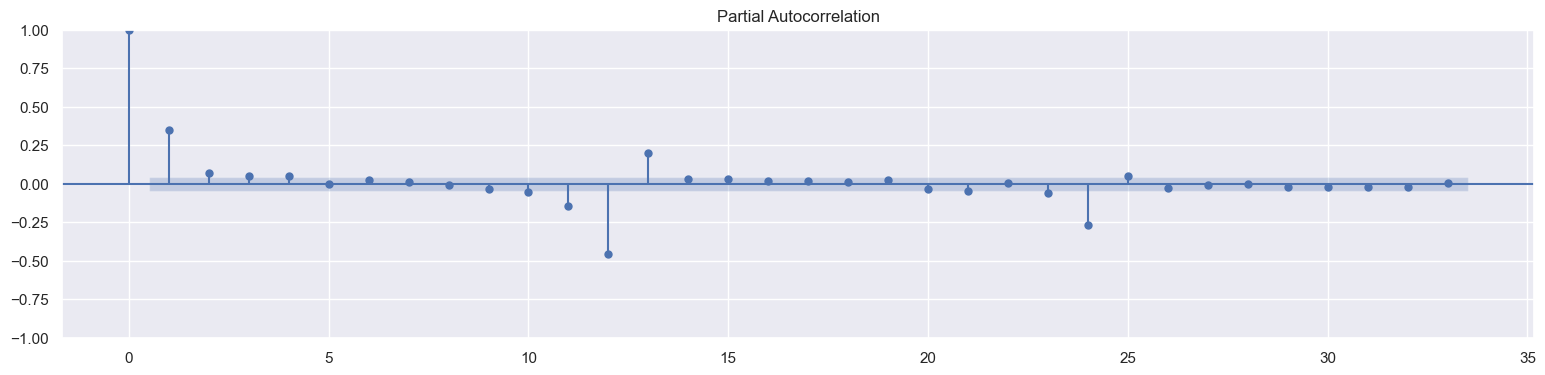

In [48]:
plot_pacf(data["landaveragetemperature"].diff(12).dropna()).set_size_inches(19,4);

#### *-->We will determine the (p,d,q)valus as : (1,1,1)/(1,1,2)*  
#### *-->We will determine the (P,D,Q)valus as : (1,0,1,12)*  

### *J.2 Applying SARIMAX function as we have excagenous fetures to be included*

In [49]:
import statsmodels.api as sm
modul_sarimax=sm.tsa.SARIMAX(data["landaveragetemperature"],order=(1,1,2),seasonal_order=(1,0,1,12),
                             exog=data[["landandoceanaveragetemperature_1st_diff","landmaxtemperature_1st_diff","landmintemperature_1st_diff"]]).fit()
print(modul_sarimax.summary())

c:\Users\Omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:               landaveragetemperature   No. Observations:                 1991
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                 -57.924
Date:                              Wed, 20 Sep 2023   AIC                            133.849
Time:                                      09:26:34   BIC                            184.212
Sample:                                  02-01-1850   HQIC                           152.346
                                       - 12-01-2015                                         
Covariance Type:                                opg                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
landandoceanaveragetemperature_1st_diff 

### *J.3 Determining the the train the test data intervals*

In [50]:
from datetime import datetime,timedelta
train_data_end=datetime(2012,12,1)
test_data_end=datetime(2015,12,1)

In [51]:
train_data=data[:train_data_end]
test_data=data[train_data_end+timedelta(days=1):test_data_end]

In [52]:
prediction_start_date=test_data.index[0]
prediction_end_date=test_data.index[-1]

### *J.4 Applying Prediction Function*

In [53]:
Prediction_sarimax=modul_sarimax.predict(start=prediction_start_date,end=prediction_end_date)

In [54]:
test_data["prediction_sarimax"]=Prediction_sarimax

### *J.5 Modul Accuracy*

#### *J.5.1 Plotting modul residual*

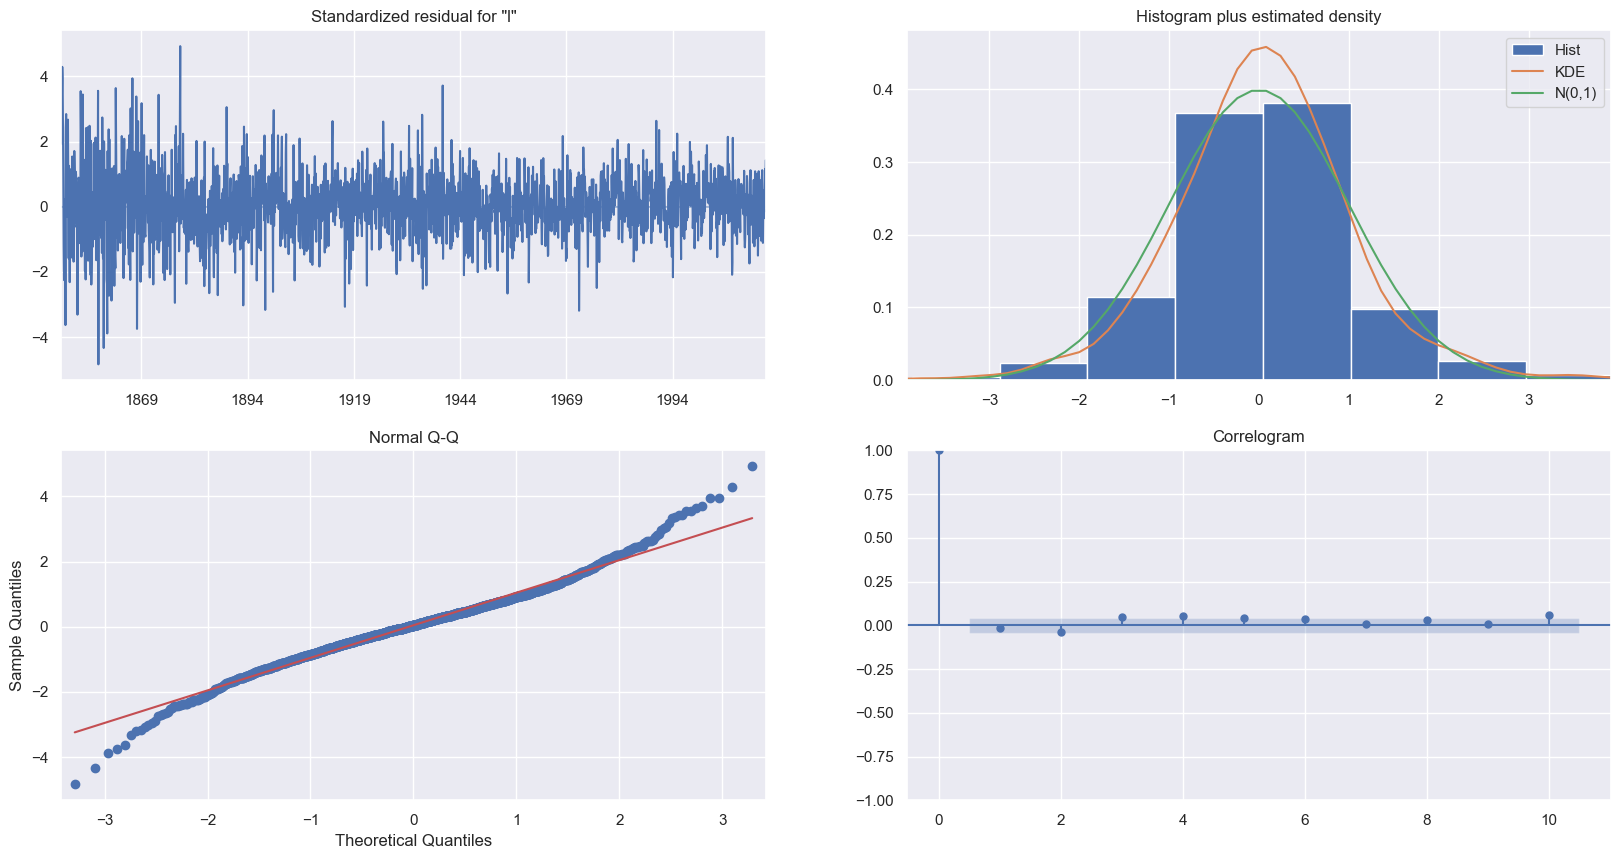

In [55]:
modul_sarimax.plot_diagnostics();

#### *J.5.2 Plotting the prediction results along with the test data to determine how our modul is fit*

<Axes: xlabel='date'>

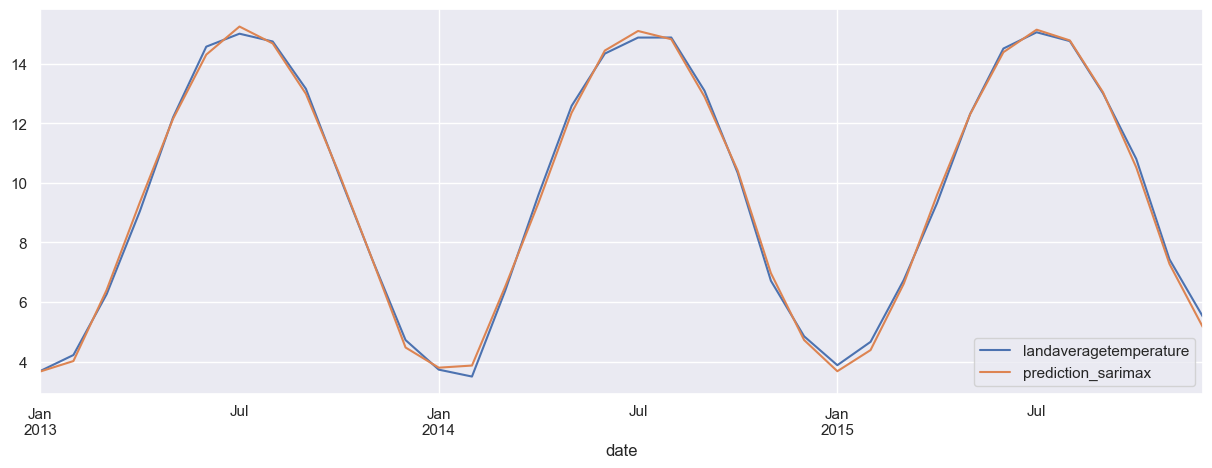

In [56]:
test_data[["landaveragetemperature","prediction_sarimax"]].plot(figsize=(15,5))

#### *J.5.3 Calculating the mse & mae*

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
mean_squared_error(test_data["landaveragetemperature"],Prediction_sarimax)

0.03658190463571453

In [59]:
mean_absolute_error(test_data["landaveragetemperature"],Prediction_sarimax)

0.16149419611337565

### *J.6 Future Prediction-forcasting*

#### *J.6.1 Creating forcasting dates ranges from 2016,2017,2018*

In [60]:
future_date_index=pd.date_range(start="2015-12-01",end="2018-12-01",freq="MS")
future_date=pd.DataFrame({"date":future_date_index}).set_index("date")

#### *J.6.2 Applying forcasting*

In [61]:
Future_Prediction_sarimax=modul_sarimax.predict(start=future_date.index[0],end=future_date.index[-1],
                                                exog=test_data[["landandoceanaveragetemperature_1st_diff","landmaxtemperature_1st_diff","landmintemperature_1st_diff"]],dynamic=True)

#### *J.6.3 Plotting our forcasr results*

<Axes: xlabel='date'>

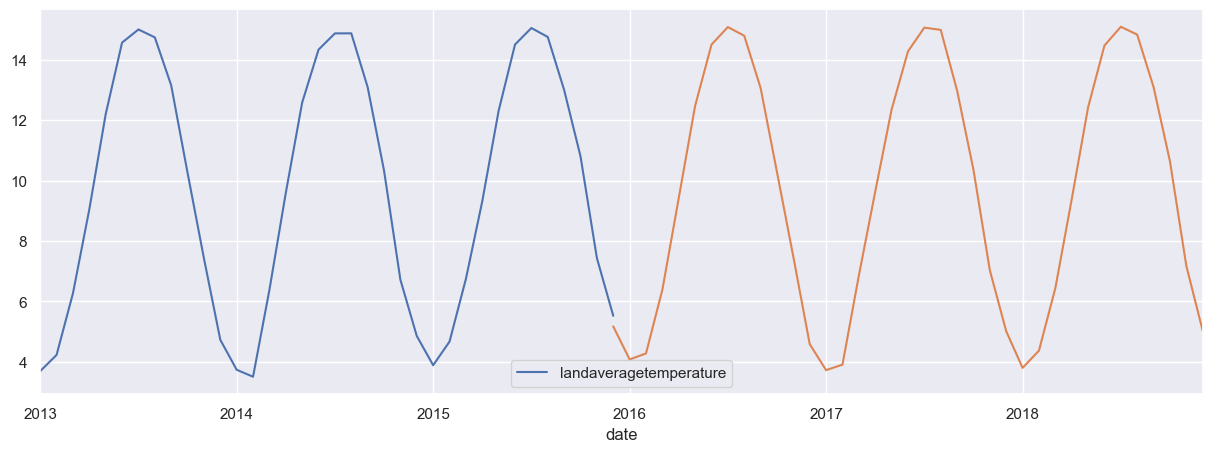

In [62]:
test_data[["landaveragetemperature"]].plot(figsize=(15,5))
Future_Prediction_sarimax.plot(figsize=(15,5))

---
---